In [1]:
!pip install "jcopdl<2.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for jcopdl: filename=jcopdl-1.1.10-py2.py3-none-any.whl size=17930 sha256=f05c77ff569bda92cd555c214772f1440848bc6b5af4ca2f63af66c711054263
  Stored in directory: /root/.cache/pip/wheels/b3/a3/76/3837f862d81a243763a3bc38d363603066dd5474e1c31dc5d6
Successfully built jcopdl


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip /content/gdrive/MyDrive/sport_ball.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/cricket_ball/cricket_ball_192.jpg  
  inflating: data/train/cricket_ball/cricket_ball_195.jpg  
  inflating: data/train/cricket_ball/cricket_ball_196.jpg  
  inflating: data/train/cricket_ball/cricket_ball_199.jpg  
  inflating: data/train/cricket_ball/cricket_ball_200.jpg  
  inflating: data/train/cricket_ball/cricket_ball_201.jpg  
  inflating: data/train/cricket_ball/cricket_ball_202.jpg  
  inflating: data/train/cricket_ball/cricket_ball_209.jpg  
  inflating: data/train/cricket_ball/cricket_ball_21.jpg  
  inflating: data/train/cricket_ball/cricket_ball_210.jpg  
  inflating: data/train/cricket_ball/cricket_ball_211.jpg  
  inflating: data/train/cricket_ball/cricket_ball_212.jpg  
  inflating: data/train/cricket_ball/cricket_ball_216.jpg  
  inflating: data/train/cricket_ball/cricket_ball_218.jpg  
  inflating: data/train/cricket_ball/cricket_ball_221.jpg  
  inflating: data/train/cricket_ball/cricket_ball_

In [4]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config
import warnings
warnings.filterwarnings('ignore')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [6]:
bs = 64
crop_size = 224

train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(crop_size, scale=(0.8,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize(230),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_set = datasets.ImageFolder("data/train/", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=0)

test_set = datasets.ImageFolder("data/test/", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [7]:
label2cat = train_set.classes
label2cat

['american_football',
 'baseball',
 'basketball',
 'billiard_ball',
 'bowling_ball',
 'cricket_ball',
 'football',
 'golf_ball',
 'hockey_ball',
 'hockey_puck',
 'rugby_ball',
 'shuttlecock',
 'table_tennis_ball',
 'tennis_ball',
 'volleyball']

In [8]:
from torchvision.models import mobilenet_v2

In [9]:
mnet = mobilenet_v2(pretrained=True)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

In [10]:
for param in mnet.parameters():
    param.requires_grad = False

In [11]:
mnet

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [23]:
mnet.classifier = nn.Sequential(
    nn.Linear(1280, 15),
    nn.LogSoftmax()
)

In [24]:
mnet

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [25]:
class CustomMobilenetV2(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.mnet = mobilenet_v2(pretrained=True)
        self.freeze()
        self.mnet.classifier = nn.Sequential(
            nn.Linear(1280, output_size),
            nn.LogSoftmax()
        )
    def forward(self, x):
        return self.mnet(x)
    
    def freeze(self):
        for param in self.mnet.parameters():
            param.requires_grad = False
    
    def unfreeze(self):
        for param in self.mnet.parameters():
            param.requires_grad = True 

In [26]:
config = set_config({
    "output_size": len(train_set.classes),
    "batch_size": bs,
    "crop_size": crop_size
})

## Phase 1 : Adaptation (lr standard + patience kecil)

In [27]:
model = CustomMobilenetV2(config.output_size).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, early_stop_patience=2, outdir="model")

In [28]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc

Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 1.3335 | Test_cost  = 0.8217 | Train_score = 0.6378 | Test_score = 0.7773 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.7417 | Test_cost  = 0.6595 | Train_score = 0.7952 | Test_score = 0.8093 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.6328 | Test_cost  = 0.6068 | Train_score = 0.8175 | Test_score = 0.8267 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.5593 | Test_cost  = 0.5670 | Train_score = 0.8367 | Test_score = 0.8381 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.5213 | Test_cost  = 0.5759 | Train_score = 0.8459 | Test_score = 0.8273 |
==> EarlyStop patience =  1 | Best test_score: 0.8381


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.4965 | Test_cost  = 0.5512 | Train_score = 0.8562 | Test_score = 0.8376 |
==> EarlyStop patience =  2 | Best test_score: 0.8381
==> Execute Early Stopping at epoch: 6 | Best test_score: 0.8381
==> Best model is saved at model


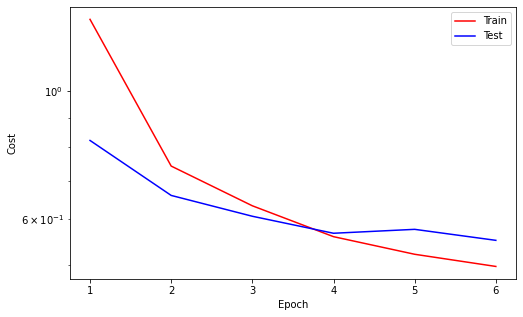

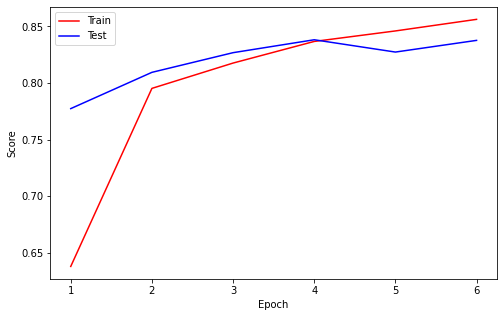

In [29]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

## Phase 2 : Fine-tuning (lr dikecilin, patience ditambah)

In [30]:
model.unfreeze()
optimizer = optim.AdamW(model.parameters(), lr=1e-5)

callback.reset_early_stop()
callback.early_stop_patience = 5

Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.4802 | Test_cost  = 0.5098 | Train_score = 0.8624 | Test_score = 0.8512 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.4019 | Test_cost  = 0.4761 | Train_score = 0.8888 | Test_score = 0.8604 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.3538 | Test_cost  = 0.4542 | Train_score = 0.9030 | Test_score = 0.8647 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.3159 | Test_cost  = 0.4369 | Train_score = 0.9112 | Test_score = 0.8762 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.2892 | Test_cost  = 0.4187 | Train_score = 0.9239 | Test_score = 0.8783 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.2626 | Test_cost  = 0.4107 | Train_score = 0.9294 | Test_score = 0.8816 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.2379 | Test_cost  = 0.4005 | Train_score = 0.9379 | Test_score = 0.8843 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.2143 | Test_cost  = 0.3896 | Train_score = 0.9464 | Test_score = 0.8870 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.1974 | Test_cost  = 0.3790 | Train_score = 0.9525 | Test_score = 0.8881 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.1769 | Test_cost  = 0.3750 | Train_score = 0.9597 | Test_score = 0.8935 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.1643 | Test_cost  = 0.3692 | Train_score = 0.9629 | Test_score = 0.8952 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.1517 | Test_cost  = 0.3657 | Train_score = 0.9692 | Test_score = 0.8946 |
==> EarlyStop patience =  1 | Best test_score: 0.8952


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.1396 | Test_cost  = 0.3594 | Train_score = 0.9698 | Test_score = 0.8995 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.1260 | Test_cost  = 0.3585 | Train_score = 0.9749 | Test_score = 0.9001 |


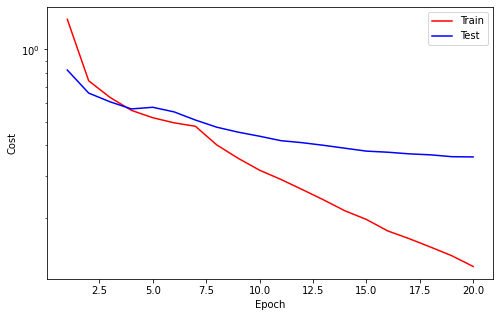

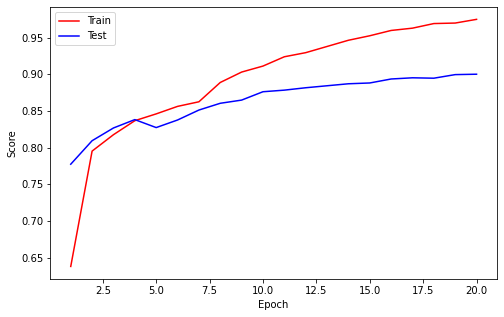

Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.1167 | Test_cost  = 0.3572 | Train_score = 0.9760 | Test_score = 0.8990 |
==> EarlyStop patience =  1 | Best test_score: 0.9001


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.1059 | Test_cost  = 0.3563 | Train_score = 0.9806 | Test_score = 0.8995 |
==> EarlyStop patience =  2 | Best test_score: 0.9001


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.1014 | Test_cost  = 0.3517 | Train_score = 0.9812 | Test_score = 0.9022 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.0908 | Test_cost  = 0.3520 | Train_score = 0.9835 | Test_score = 0.9006 |
==> EarlyStop patience =  1 | Best test_score: 0.9022


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.0784 | Test_cost  = 0.3442 | Train_score = 0.9889 | Test_score = 0.9022 |
==> EarlyStop patience =  2 | Best test_score: 0.9022


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    26
Train_cost  = 0.0767 | Test_cost  = 0.3468 | Train_score = 0.9883 | Test_score = 0.9077 |


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    27
Train_cost  = 0.0733 | Test_cost  = 0.3430 | Train_score = 0.9894 | Test_score = 0.9044 |
==> EarlyStop patience =  1 | Best test_score: 0.9077


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    28
Train_cost  = 0.0694 | Test_cost  = 0.3414 | Train_score = 0.9891 | Test_score = 0.9044 |
==> EarlyStop patience =  2 | Best test_score: 0.9077


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    29
Train_cost  = 0.0593 | Test_cost  = 0.3426 | Train_score = 0.9919 | Test_score = 0.9066 |
==> EarlyStop patience =  3 | Best test_score: 0.9077


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    30
Train_cost  = 0.0534 | Test_cost  = 0.3433 | Train_score = 0.9940 | Test_score = 0.9066 |
==> EarlyStop patience =  4 | Best test_score: 0.9077


Train:   0%|          | 0/115 [00:00<?, ?it/s]

Test:   0%|          | 0/29 [00:00<?, ?it/s]


Epoch    31
Train_cost  = 0.0495 | Test_cost  = 0.3395 | Train_score = 0.9952 | Test_score = 0.9066 |
==> EarlyStop patience =  5 | Best test_score: 0.9077
==> Execute Early Stopping at epoch: 31 | Best test_score: 0.9077
==> Best model is saved at model


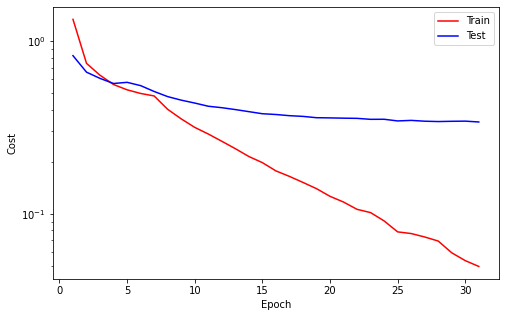

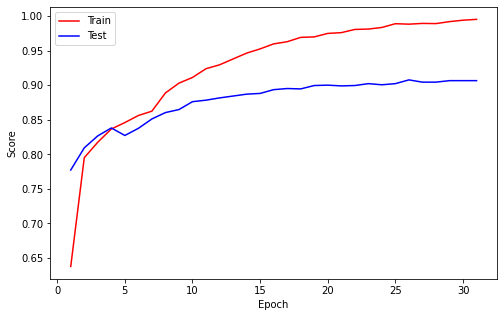

In [31]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

In [100]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)

In [101]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
preds

tensor([13,  8,  4,  6, 14, 14, 10,  7,  4, 11,  2,  7,  5,  2,  5,  4,  0,  7,
         8, 10,  2,  8,  6, 12, 12,  6, 11,  0, 10,  2, 12,  5,  4,  5,  8, 14,
        11, 12, 11, 10,  7, 13,  7,  1, 12,  5,  5,  3, 11,  7,  4,  3,  3,  4,
         4, 12,  0, 10,  3,  1, 13, 11,  3, 11], device='cuda:0')

In [102]:
import matplotlib.pyplot as plt

In [103]:
def inverse_norm(img):
    img[0, :, :] = img[0, :, :] * 0.229 + 0.485
    img[1, :, :] = img[1, :, :] * 0.229 + 0.485
    img[2, :, :] = img[2, :, :] * 0.229 + 0.485
    return img

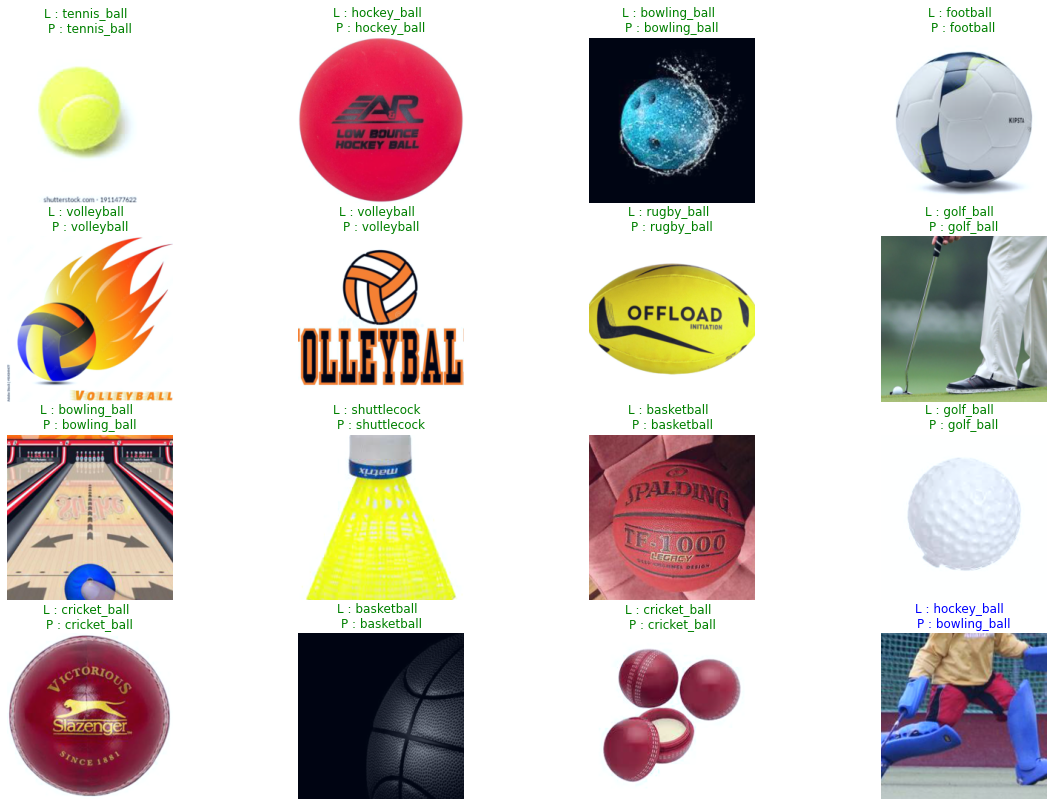

In [104]:
fig, axes = plt.subplots(4,4, figsize=(20,14))
for image, label,pred, ax in zip(feature,target,preds,axes.flatten()):
    ax.imshow(inverse_norm(image).permute(1,2,0).cpu())
    font = {"color": 'b'} if (pred != label).any() else {"color": 'g'}
    label,pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f"L : {label}  \nP : {pred}", fontdict=font);
    ax.axis('off');

In [81]:
!zip -r model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/configs.pth (deflated 52%)
  adding: content/model/logs.pth (deflated 24%)
  adding: content/model/weights_best.pth (deflated 8%)
